In [1]:
import numpy as np
import matplotlib.pyplot as plt

$-\frac{d^2u}{dx^2} + 100\frac{du}{dx} = 0,  0 < x < 1, $ <br>
$u(0) = 0, u(1) = 1$

Будем решать задачу: <br>
$-\frac{\partial^2 u}{\partial x^2} + 100\frac{\partial u}{\partial x} = \frac{\partial u}{\partial t}$ <br>
Пока $\frac{\partial u}{\partial t}$ не будет меньше $\delta$ <br>
С начальным условием:<br>
$U(t = 0, 0 <= x < 1) = 0$<br>
$U(t = 0, x = 1) = 1$

In [43]:
def second_deriv_2(U, h):
    U_ = U.copy()
    U_[1:-1] = (U[:-2] - 2. * U[1:-1] + U[2:]) / h ** 2
    return U_
def second_deriv_4(U, h):
    U_ = U.copy()
    U_[3:-3] = (U[:-6] / 90. + U[6:] / 90. - 3. * U[1:-5] / 20. - 3. * U[5:-1] / 20 + 3. / 2. * U[2:-4] + 3. / 2. * U[4:-2] - 49. / 18. * U[3:-3]) / h ** 2
    return U_

In [4]:
from central_diference import generate_cd
cd_2 = generate_cd(2).get_cd_as_function()
cd_4 = generate_cd(4).get_cd_as_function()
cd_6 = generate_cd(6).get_cd_as_function()
cd_8 = generate_cd(8).get_cd_as_function()

In [88]:
from weno import weno_5, weno_m_5

In [5]:
import runge_kutta as rk
def rk_4(U, h, r, Deriv):
    dt = r * h
    return rk.runge_kutta(4, U, dt, Deriv, (h,)), dt
def rk_8(U, h, r, Deriv):
    dt = r * h
    return rk.runge_kutta(8, U, dt, Deriv, (h,)), dt

In [99]:
def equation(U, h):
    return second_deriv_4(U, h) - 100 * cd_4(U, h)
    #return -cd_4(U, h)
def deviation(U, U_ex, h):
    return np.sqrt(np.sum((U - U_ex) ** 2 * h))

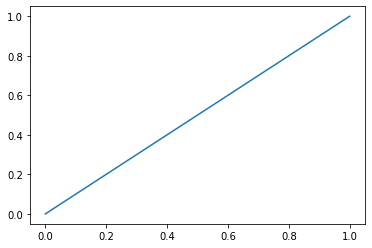

In [108]:
h = 1e-1
r = .5
N = int(1. / h)
U = np.linspace(0, 1, N + 1)
#U = np.zeros(N)
#U[-3:] = 1
x = np.linspace(0, 1, N + 1)
U_ex = (np.exp(100 * x) - 1) / (np.exp(100) - 1)
delta = 1e-3
plt.plot(x, U)

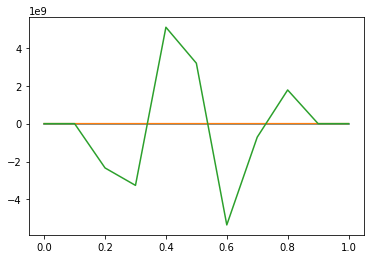

In [109]:
#U = np.sin(np.pi * x) ** 4
T = 0
i = 0
while i < 3:
    plt.plot(x, U)
    U, dt = rk_4(U, h, r, equation)
    T += dt
    i += 1
    if deviation(U, U_ex, h) <= delta: break

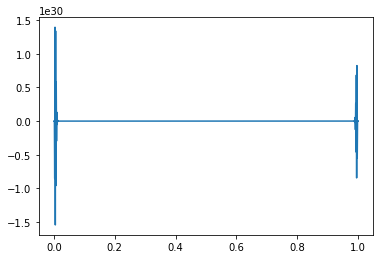

In [107]:
plt.plot(x, U)